In [120]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [121]:
df_ADX = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_ADX.csv")
df_Bahrain = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_Bahrain.csv")
df_DFM = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_DFM.csv")
df_Kuwait = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_Kuwait.csv")
df_Oman = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_Oman.csv")
df_Qatar = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_Qatar.csv")
df_SaudiArabia = pd.read_csv("https://raw.githubusercontent.com/liadzila/Coursework/main/data_SaudiArabia.csv")

In [122]:
dfs = [df_ADX, df_Bahrain, df_DFM, df_Kuwait, df_Oman, df_Qatar, df_SaudiArabia]

In [123]:
def data_prep(df):
  result = pd.DataFrame()
  df = df.set_index('Unnamed: 0')[::-1]
  df = df.rename_axis('Symbol')
  df = df.replace(',','', regex=True)
  df = df.dropna(how = "all")
  df = df.dropna(how = "all", axis = 1)
  scaler = StandardScaler()
  df = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)
  df = df.fillna(method = 'ffill')
  df = df.fillna(method = 'bfill')
  result['Returns'] = df.pct_change().mean() * (len(df.index))
  result['Volatility'] = df.pct_change().std() * sqrt(len(df.index))
  result.replace([np.inf, - np.inf], np.nan, inplace = True)
  result.dropna(inplace = True)
  return result

In [124]:
df_ADX = data_prep(df_ADX)
df_Bahrain = data_prep(df_Bahrain)
df_DFM = data_prep(df_DFM)
df_Kuwait = data_prep(df_Kuwait)
df_Oman = data_prep(df_Oman)
df_Qatar = data_prep(df_Qatar)
df_SaudiArabia = data_prep(df_SaudiArabia)

In [125]:
def elbow(df):
  data = np.asarray([np.asarray(df['Returns']), np.asarray(df['Volatility'])]).T
  X = data
  error = []
  for k in range(1, 8):
      k_means = KMeans(n_clusters = k)
      k_means.fit(X)
      error.append(k_means.inertia_)
  fig = plt.figure(figsize = (15, 5))
  plt.plot(range(1, 8), error)
  plt.title('Elbow curve')

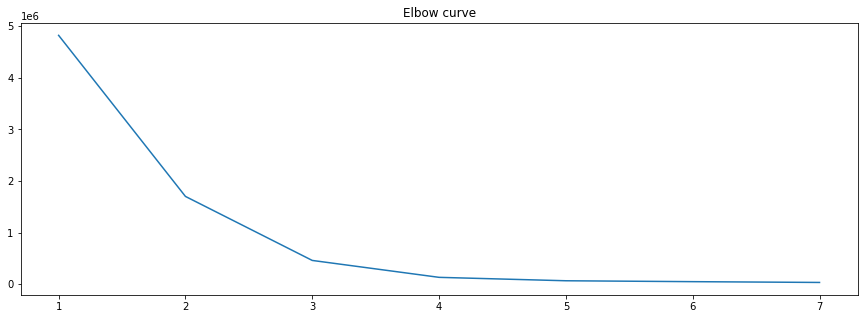

In [126]:
elbow(df_ADX)

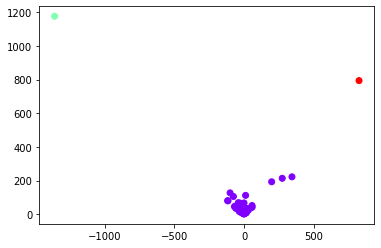

In [127]:
kmeans = KMeans(n_clusters = 3).fit(df_ADX)
centroids = kmeans.cluster_centers_
plt.scatter(df_ADX.iloc[:,0], df_ADX.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

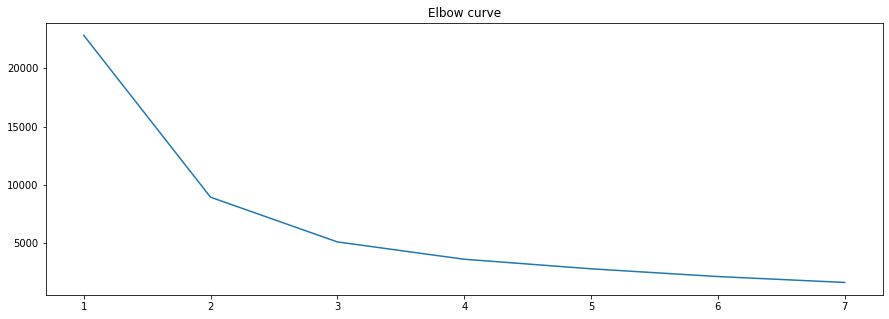

In [128]:
elbow(df_Bahrain)

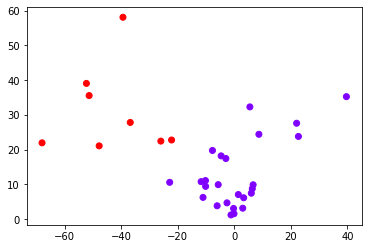

In [129]:
kmeans = KMeans(n_clusters = 2).fit(df_Bahrain)
centroids = kmeans.cluster_centers_
plt.scatter(df_Bahrain.iloc[:,0], df_Bahrain.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

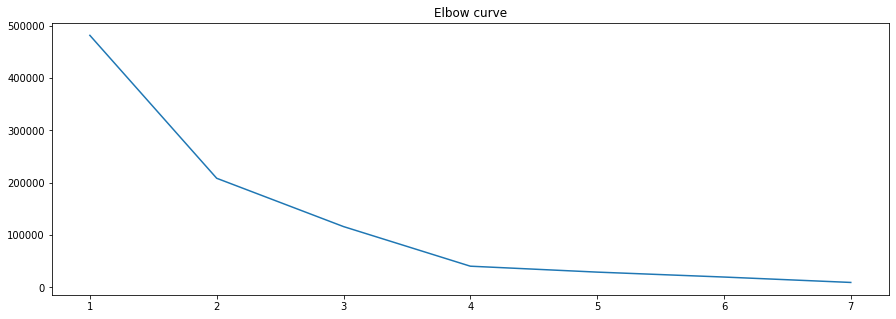

In [130]:
elbow(df_DFM)

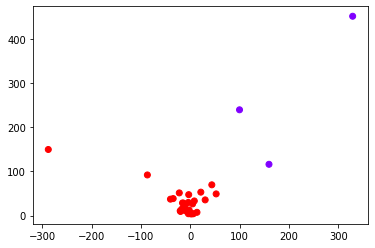

In [131]:
kmeans = KMeans(n_clusters = 2).fit(df_DFM)
centroids = kmeans.cluster_centers_
plt.scatter(df_DFM.iloc[:,0], df_DFM.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

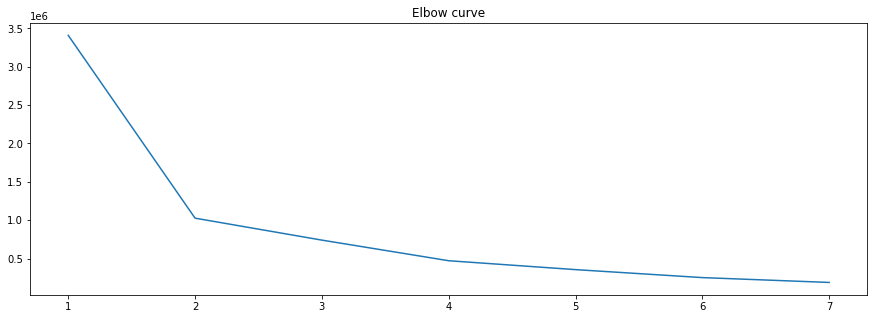

In [132]:
elbow(df_Kuwait)

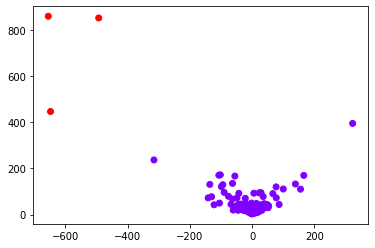

In [133]:
kmeans = KMeans(n_clusters = 2).fit(df_Kuwait)
centroids = kmeans.cluster_centers_
plt.scatter(df_Kuwait.iloc[:,0], df_Kuwait.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

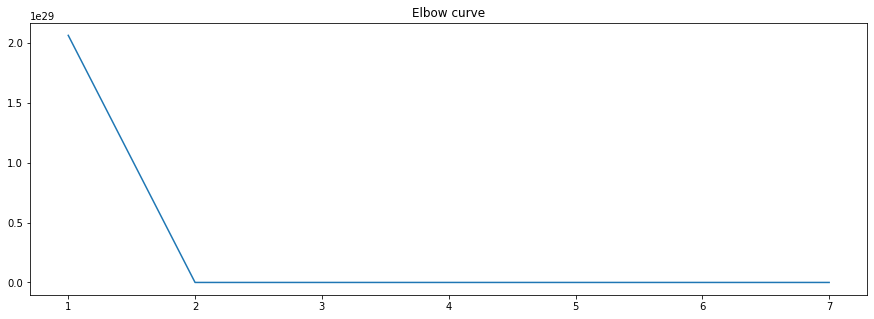

In [134]:
elbow(df_Oman)

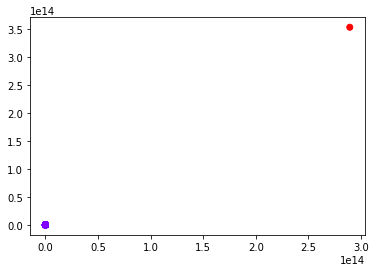

In [135]:
kmeans = KMeans(n_clusters = 2).fit(df_Oman)
centroids = kmeans.cluster_centers_
plt.scatter(df_Oman.iloc[:,0], df_Oman.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

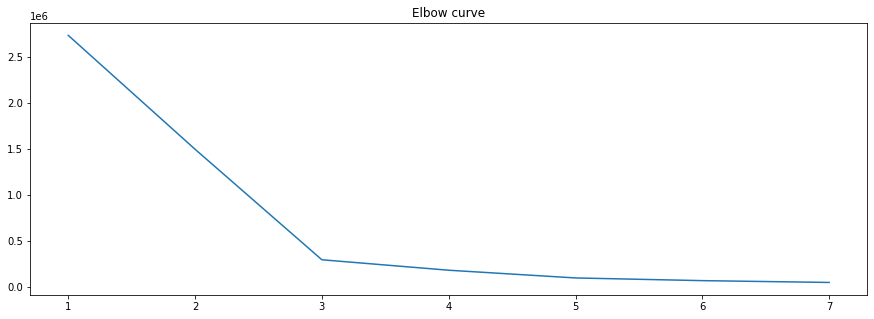

In [136]:
elbow(df_Qatar)

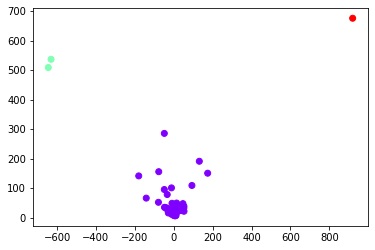

In [137]:
kmeans = KMeans(n_clusters = 3).fit(df_Qatar)
centroids = kmeans.cluster_centers_
plt.scatter(df_Qatar.iloc[:,0], df_Qatar.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

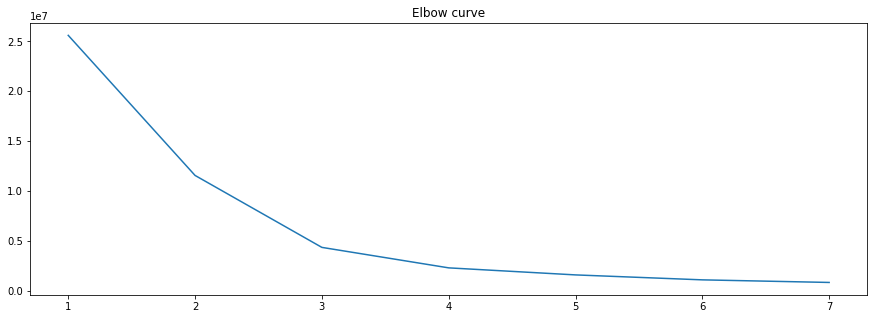

In [138]:
elbow(df_SaudiArabia)

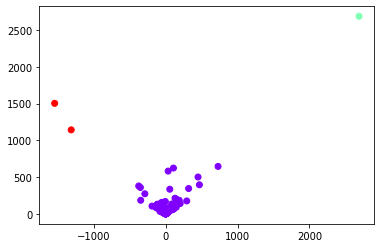

In [139]:
kmeans = KMeans(n_clusters = 3).fit(df_SaudiArabia)
centroids = kmeans.cluster_centers_
plt.scatter(df_SaudiArabia.iloc[:,0], df_SaudiArabia.iloc[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [140]:
dbscan = DBSCAN()
model_ADX = dbscan.fit(df_ADX)
df_ADX['clusters'] = dbscan.labels_
clust_ADX = df_ADX['clusters'].value_counts()

model_Bahrain = dbscan.fit(df_Bahrain)
df_Bahrain['clusters'] = dbscan.labels_
clust_Bahrain = df_Bahrain['clusters'] .value_counts()

model_DFM = dbscan.fit(df_DFM)
df_DFM['clusters'] = dbscan.labels_
clust_DFM = df_DFM['clusters'].value_counts()

model_Kuwait = dbscan.fit(df_Kuwait)
df_Kuwait['clusters'] = dbscan.labels_
clust_Kuwait = df_Kuwait['clusters'].value_counts()

model_Oman = dbscan.fit(df_Oman)
df_Oman['clusters'] = dbscan.labels_
clust_Oman = df_Oman['clusters'].value_counts()

model_Qatar = dbscan.fit(df_Qatar)
df_Qatar['clusters'] = dbscan.labels_
clust_Qatar = df_Qatar['clusters'].value_counts()

model_SaudiArabia = dbscan.fit(df_SaudiArabia)
df_SaudiArabia['clusters'] = dbscan.labels_
clust_SaudiArabia = df_SaudiArabia['clusters'].value_counts()

print("ADX_clusters \n", clust_ADX, "\n DFM clusters \n", clust_DFM,  "\n Bahrain clusters \n", clust_Bahrain,  "\n Kuwait clusters \n", clust_Kuwait,
      "\n Oman clusters \n", clust_Oman, "\n Qatar clusters \n", clust_Qatar, "\n Saudi Arabia clusters \n", clust_SaudiArabia)

ADX_clusters 
 -1    71
Name: clusters, dtype: int64 
 DFM clusters 
 -1    31
Name: clusters, dtype: int64 
 Bahrain clusters 
 -1    33
Name: clusters, dtype: int64 
 Kuwait clusters 
 -1    154
Name: clusters, dtype: int64 
 Oman clusters 
 -1    73
Name: clusters, dtype: int64 
 Qatar clusters 
 -1    49
Name: clusters, dtype: int64 
 Saudi Arabia clusters 
 -1    218
Name: clusters, dtype: int64
